In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("./glass.csv")
data.describe()
cols = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]

Plik z danymi składa się z informacji o indeksie refrakcji danego typu szkła, składzie szkła (z jakich pierwiastków się składa), oraz typie szkła - jego zastosowaniu.
Szkło jest wykonane w różnym stopniu z następujących pierwiastków: magnezu, aluminium, krzemu, potasu, wapna, baru i żelaza. 
Typy szkła to: przetworzone szkło budowlane typu float (building_windows_float_processed), przetworzone szkło budowlane typu nonfloat (building_windows_non_float_processed),
przetworzone szkło dla pojazdów float (vehicle_windows_float_processed), pojemników (containers), zastawy stołowej (tableware), reflektorów (headlamps). 
Typ oznaczony jako 4 nie występuje w bazie danych.

<AxesSubplot:>

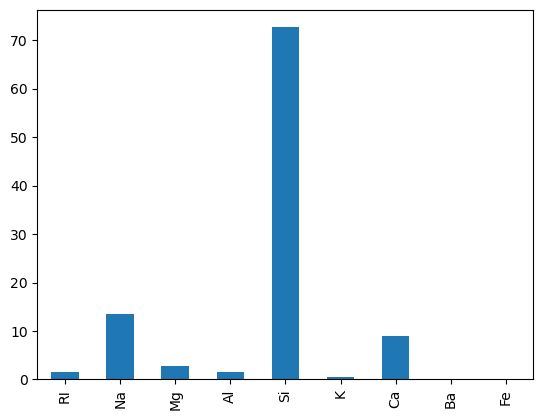

In [2]:
#Wykres zawartości poszczególnych pierwiastków
data_mean = data.drop(columns=["RI"],axis = 1)
data_mean = data.drop(columns=["Type"],axis = 1)
data_mean = data_mean.mean()
data_mean.plot.bar()

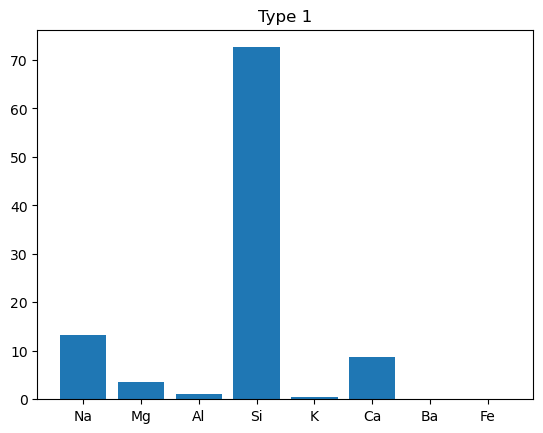

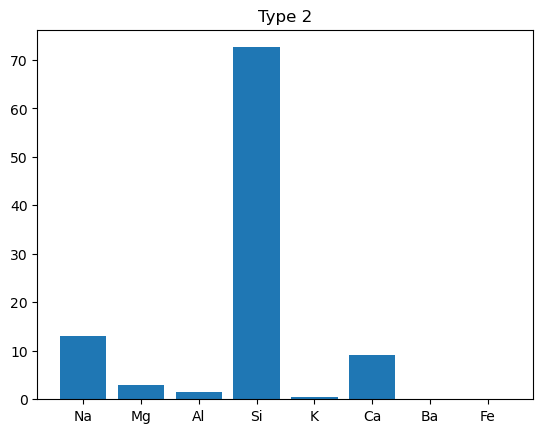

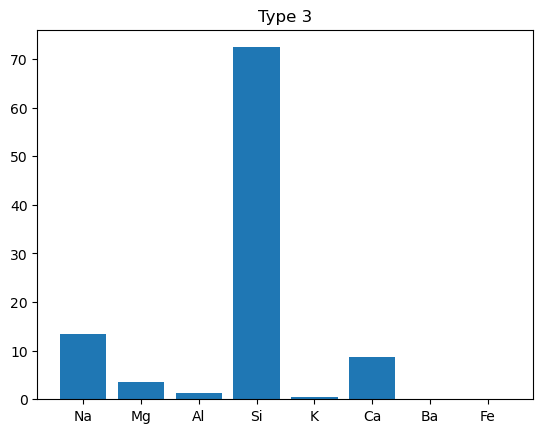

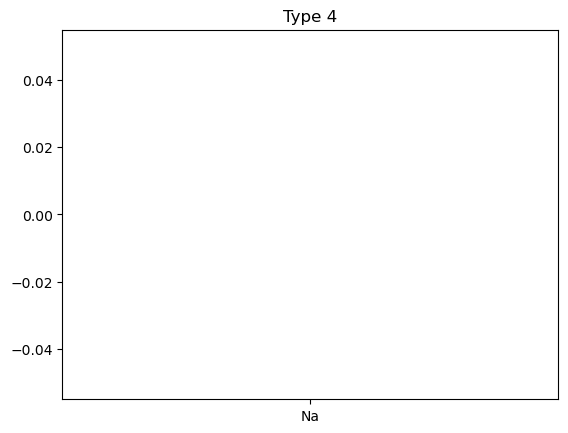

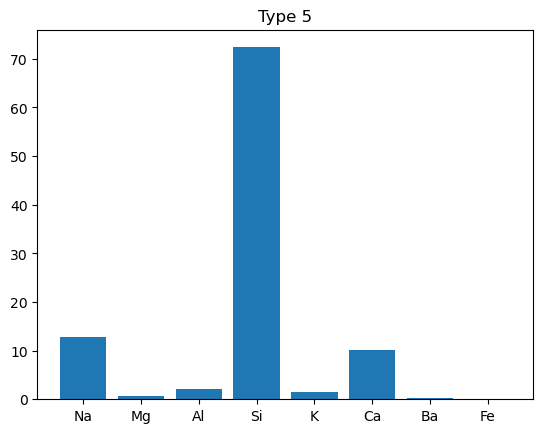

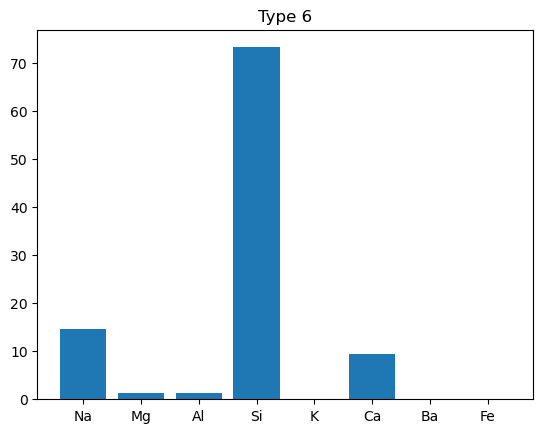

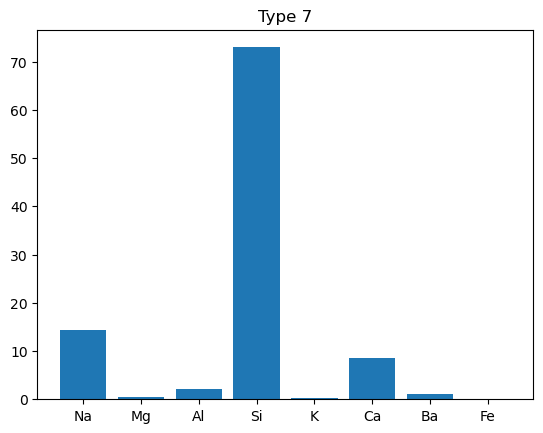

In [3]:
#Zawartość poszczególnych pierwiastków różnych typach szkła
data1 = data.drop(columns=["RI"],axis = 1)
x_values = ["Na","Mg","Al","Si","K","Ca","Ba","Fe"]
for i in range(1,8):
    data_plot = data1.loc[data['Type'] == i]
    data_plot = data_plot.drop(columns=["Type"],axis = 1)
    data_plot = data_plot.mean()
    y_values = data_plot.tolist()
    plt.title(f'Type {i}')
    plt.bar(x_values,y_values)
    plt.show()
#    data_plot.plot.bar()


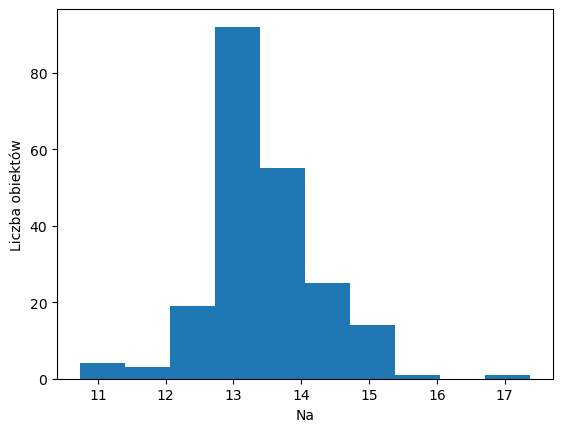

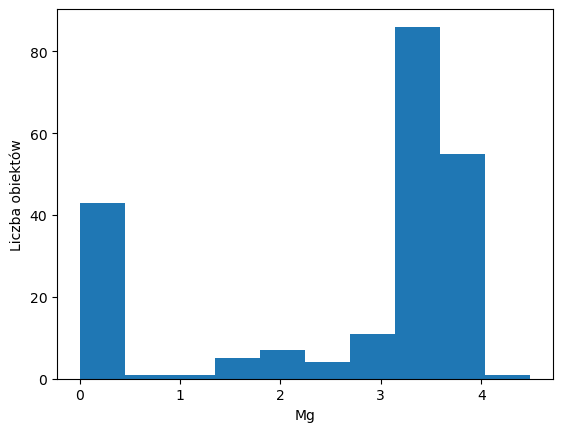

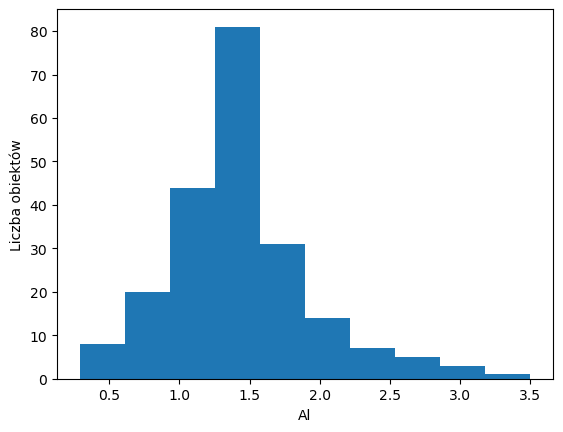

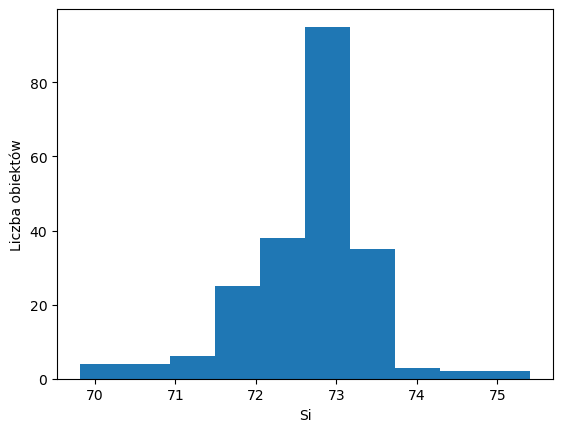

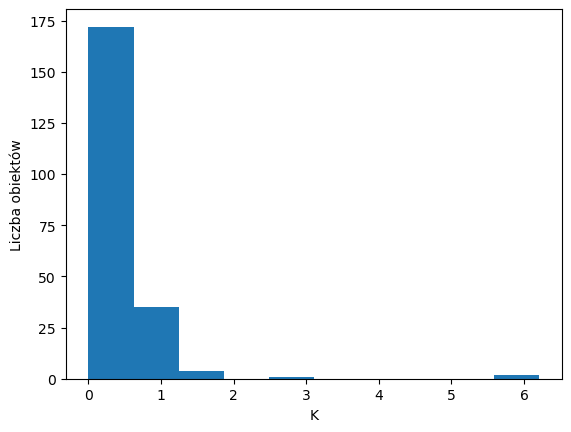

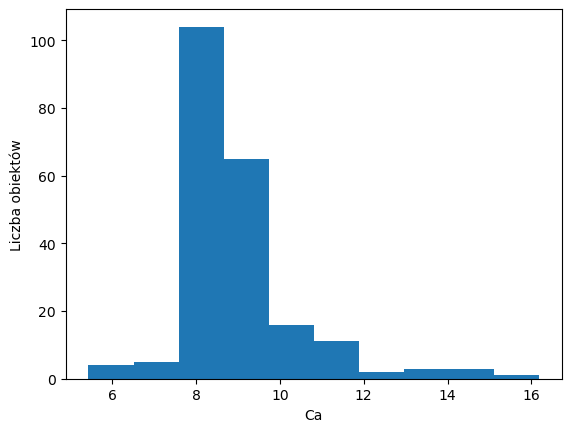

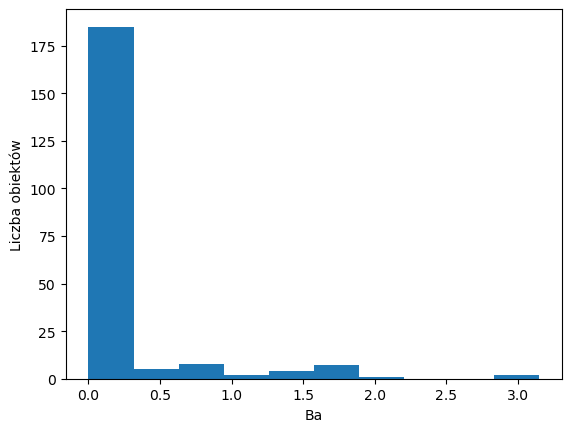

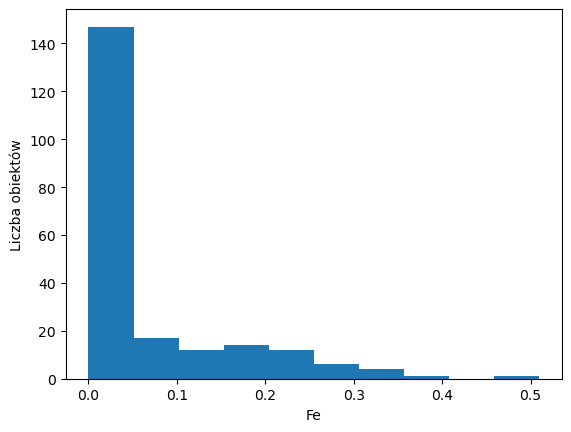

In [4]:
#Liczba obiektów o poszczególnej zawartości 
for i in data[x_values].columns:
    plt.hist(data[x_values][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

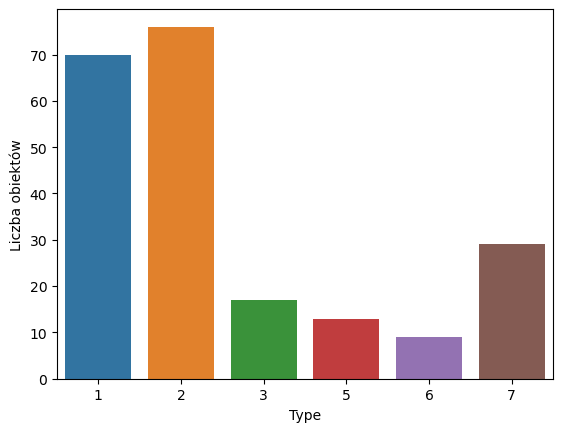

In [5]:
for i in data[['Type']].columns:
    sns.barplot(x=data[['Type']][i].value_counts().index,y=data[['Type']][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

<AxesSubplot:>

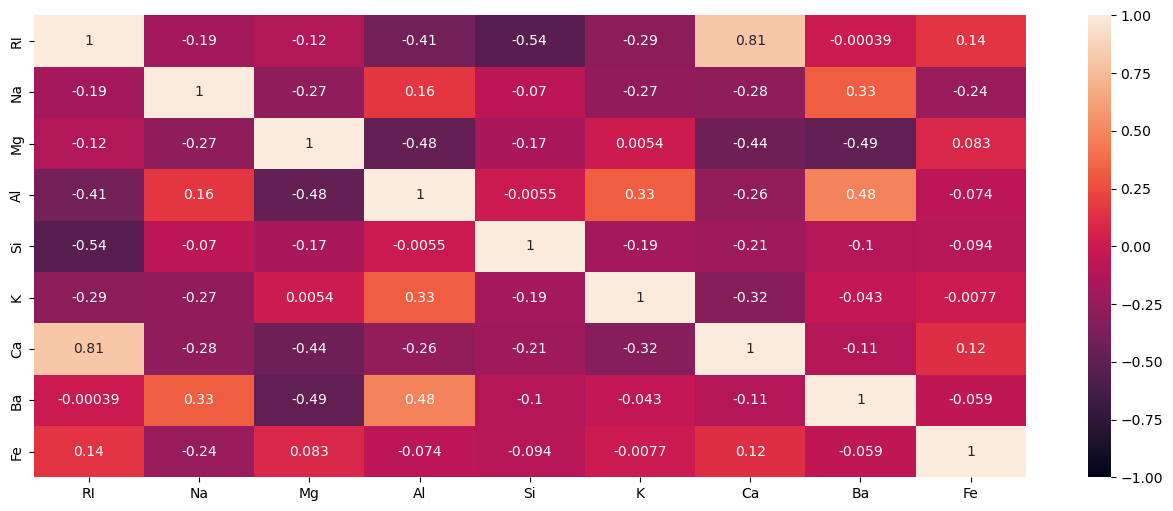

In [6]:
plt.figure(figsize=(16, 6))
sns.heatmap(data[cols].corr(method='pearson'), vmin=-1, vmax=1, annot=True)

Jak widać największa korelacja pierwiastków jest między  Mg i Ba (-0,49) oraz Al i Mg (-0,48) oraz współczynnik RI i pierwiastka Ca (0,81) i Si(-0,54)

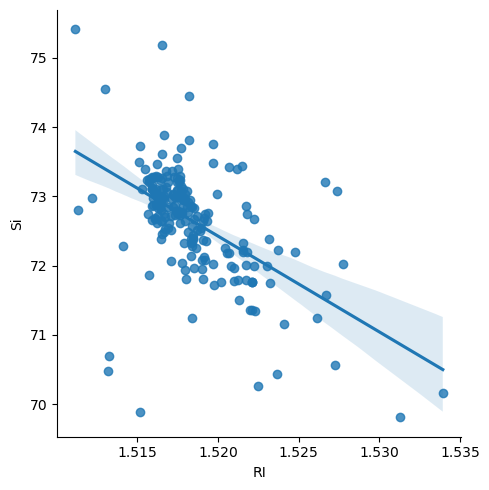

In [7]:
#Wykres najbardziej skorelowanych zmiennych
sns.lmplot(x='RI', y='Si', data=data)
plt.show()

Na powyższym wykresie korelacji refrakcji z zawartością krzemu widać, że istnieje dominująca korelacja, ale także sporo punktów, które nie wykazują takiej zależności.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


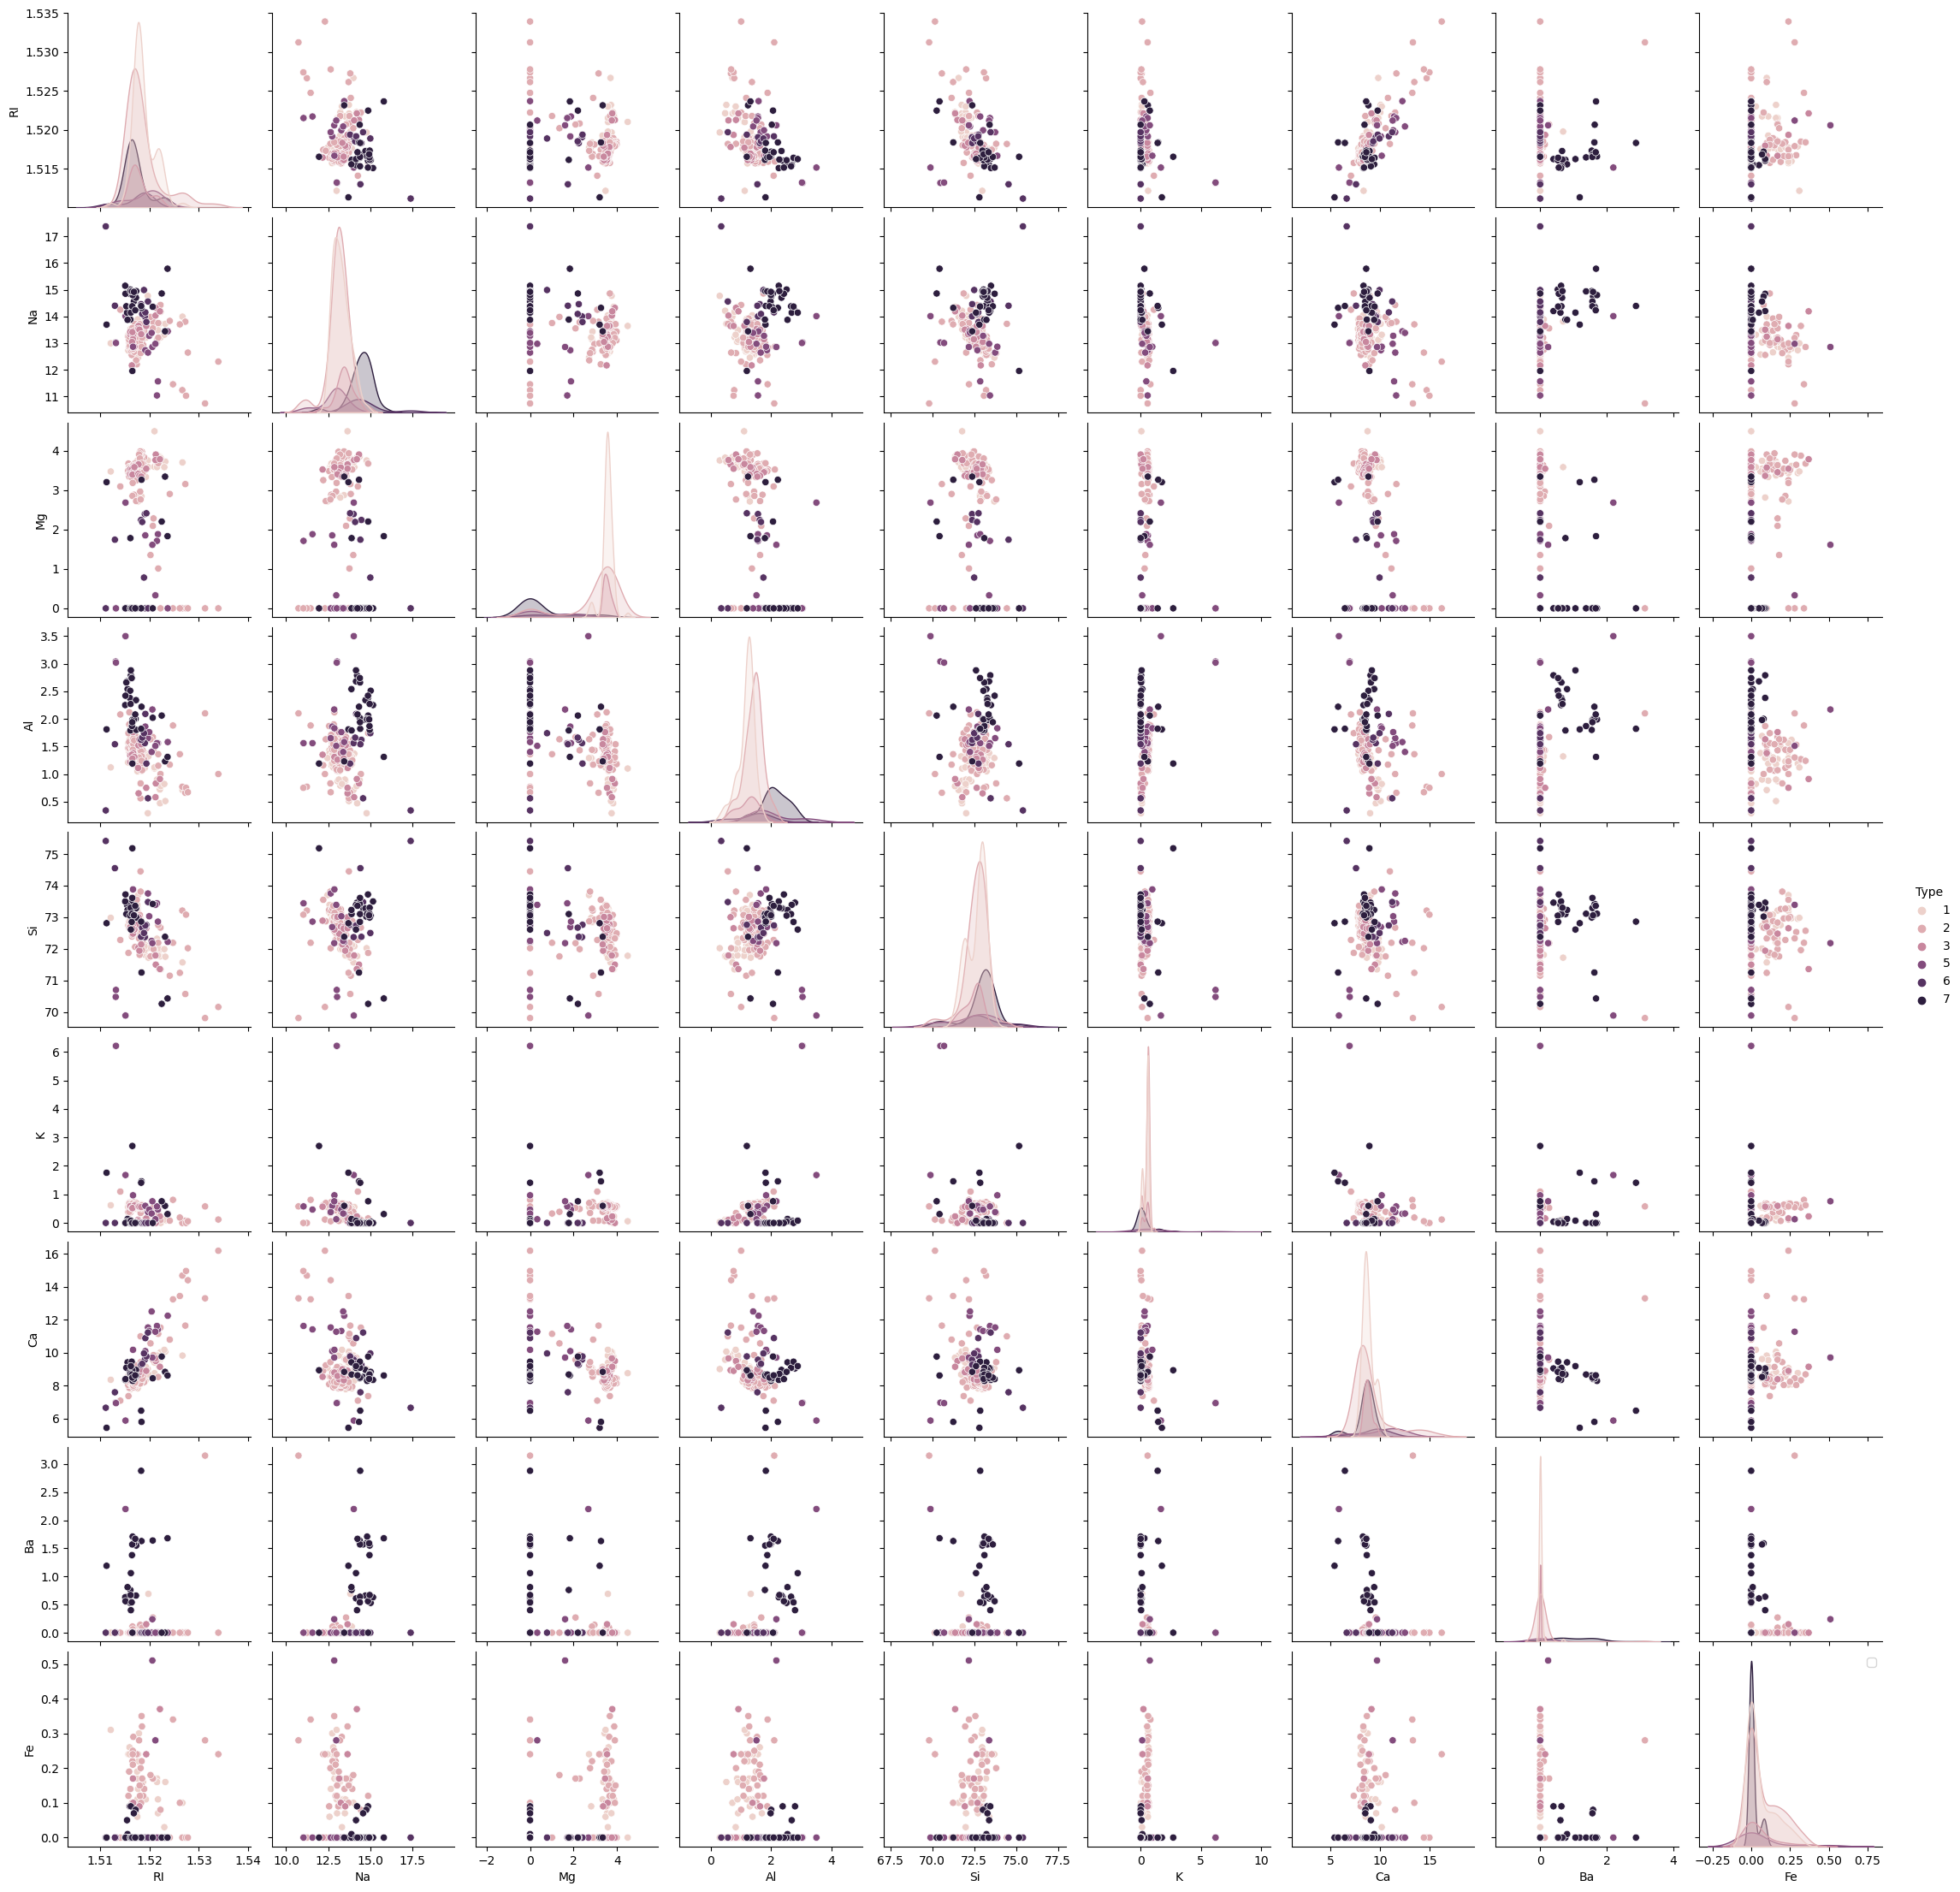

In [8]:
sns.pairplot(data,hue='Type')
plt.legend()
plt.show()

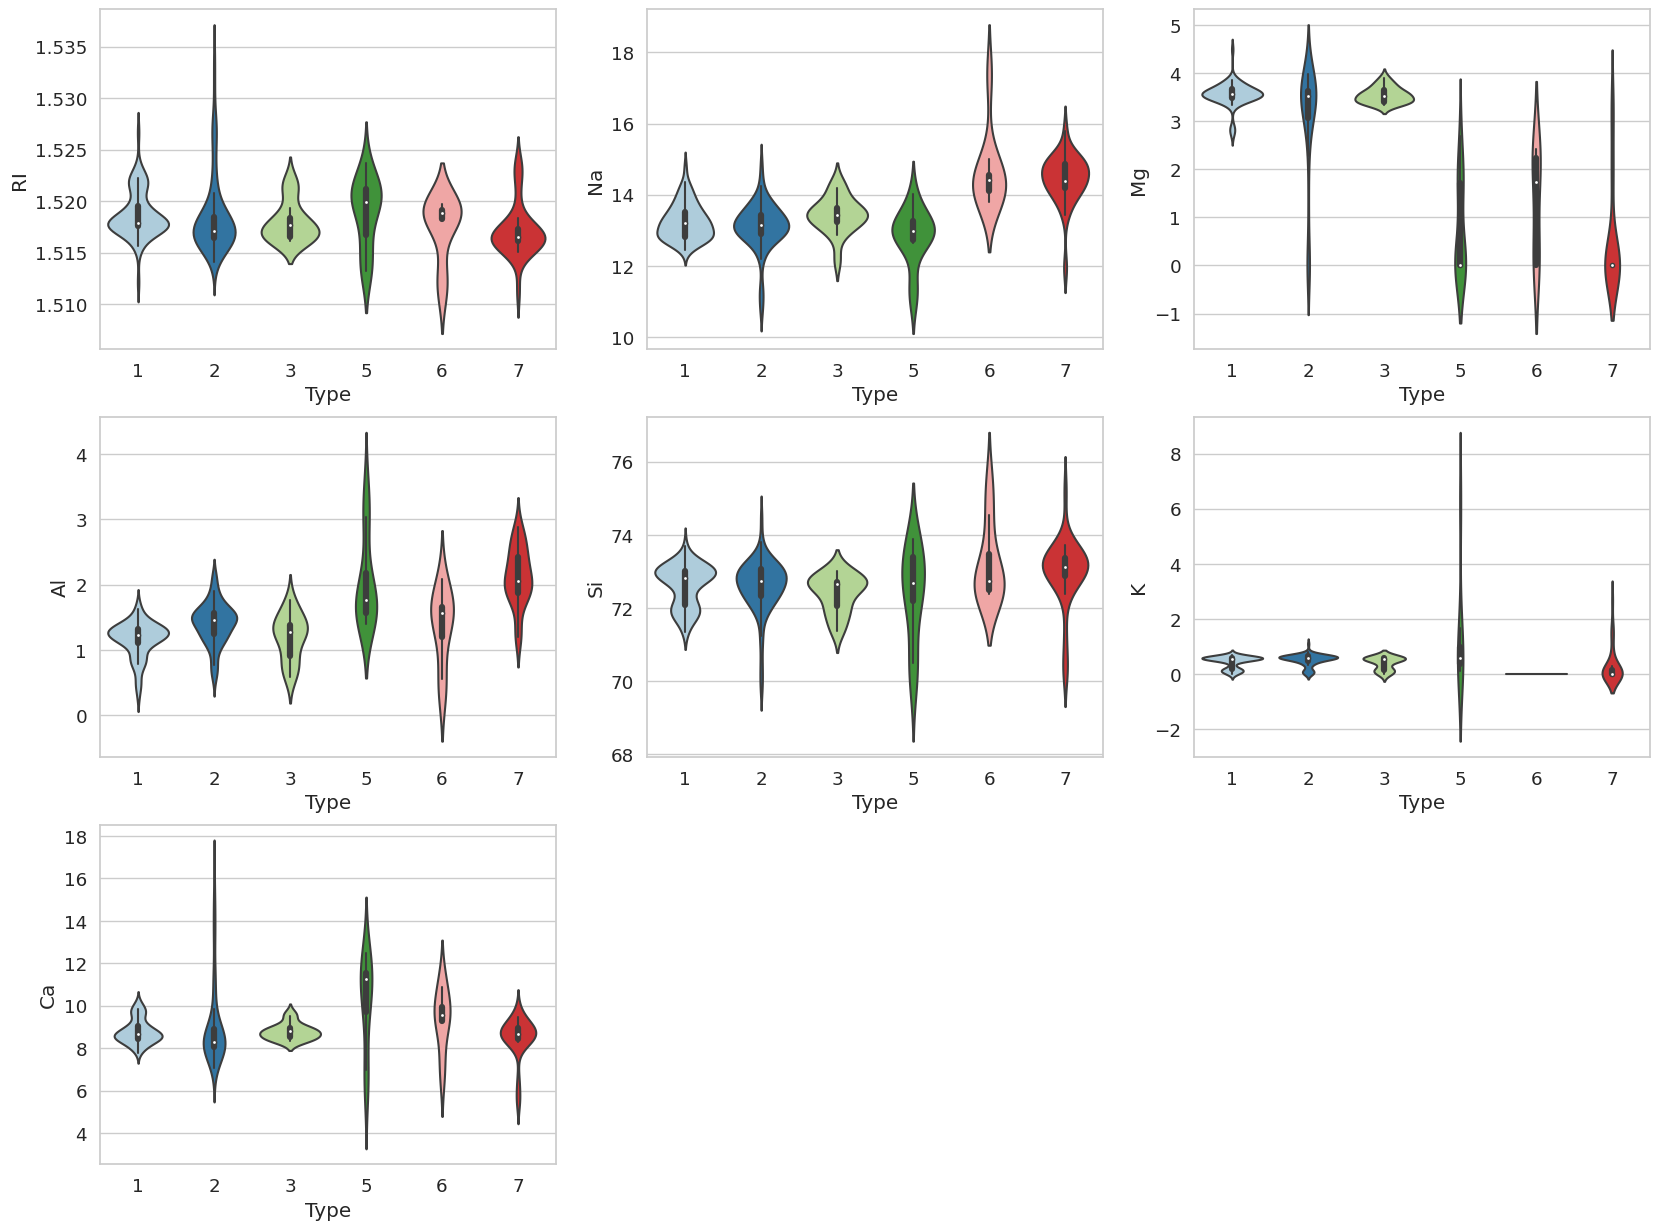

In [9]:
sns.set(style = "whitegrid", font_scale = 1.2, palette = "Paired")
plt.subplots(figsize = (20, 15))

for i in range(1,8):
    plt.subplot(3, 3, i)
    sns.violinplot(x = 'Type', y = cols[i-1], data = data)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

X = pd.DataFrame(data.drop(["Type"], axis = 1),
            columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
y = data.Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 40, stratify = y)

knn = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(1,50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

n_neig = knn_cv_model.best_params_['n_neighbors']

knn_tuned = KNeighborsClassifier(n_neighbors = n_neig).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score for KNN: {}'.format(knn_accuracy))

Accuracy score for KNN: 0.7441860465116279


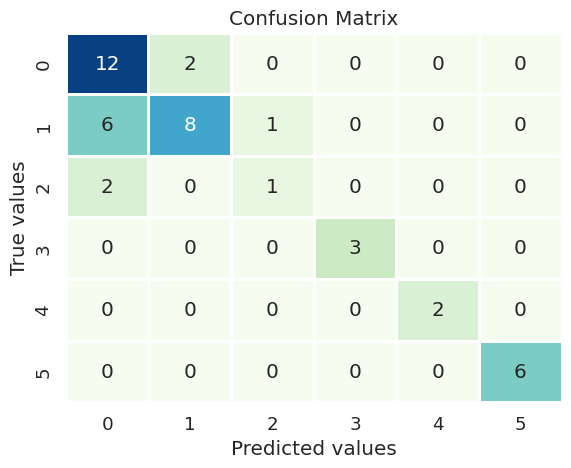

In [11]:
#Confusion Matrix of KNN
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()

best K is: 1
prediction precision rate: 0.9


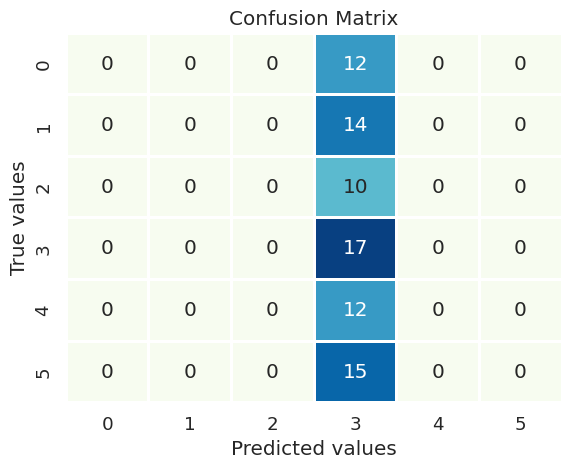

In [12]:
data3=data[data['Type']==3]
data3=pd.concat([data3]*4)
data5=data[data['Type']==5]
data5=pd.concat([data5]*5)
data6=data[data['Type']==6]
data6=pd.concat([data6]*7)
data7=data[data['Type']==7]
data7=pd.concat([data7]*2)
data1=data[data['Type']==1]
data2=data[data['Type']==2]
data_balanced=pd.concat([data1,data2,data3,data5,data6,data7])
data_balanced.shape


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# data.columns is column labels property
features=data_balanced.columns[:-1].tolist()
X=data_balanced[features].values
y=data_balanced['Type']

# normalization
min_max_scaler=preprocessing.MinMaxScaler()
X_minmax=min_max_scaler.fit_transform(X)


X_train,X_test,y_train,y_test=train_test_split(X_minmax,y,test_size=0.2,random_state=1)
scores=[]
for k in range(32):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    score_mean=score_val.mean()
    scores.append(score_mean)
best_K=np.argmax(scores)+1
print('best K is:',best_K)
knn=KNeighborsClassifier(best_K)
knn.fit(X_train,y_train)
y_pred = knn_tuned.predict(X_test)
print("prediction precision rate:",knn.score(X_test,y_test))

#Confusion Matrix of KNN
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()